In [ ]:
# Import necessary libraries

# TensorFlow library for deep learning tasks
# Usage: Used for building, training, and evaluating neural networks.
# Return Type: Module (tensorflow)
import tensorflow as tf

# OS library for interacting with the operating system
# Usage: Used for file handling, directory management, and accessing system paths.
# Return Type: Module (os)
import os

# NumPy for numerical operations
# Usage: Used for handling arrays, mathematical operations, and matrix computations.
# Return Type: Module (numpy)
import numpy as np

# Pandas for data manipulation and analysis
# Usage: Used to handle structured data in DataFrame format.
# Return Type: Module (pandas)
import pandas as pd

# Matplotlib for data visualization
# Usage: Used to create plots, graphs, and visualizations.
# Return Type: Module (matplotlib.pyplot)
import matplotlib.pyplot as plt

# OpenCV for image processing
# Usage: Used for reading, manipulating, and transforming images.
# Return Type: Module (cv2)
import cv2

# Enables inline plotting in Jupyter Notebook
# Usage: Displays plots directly inside Jupyter Notebook.
# Return Type: None (Jupyter Notebook command)
%matplotlib inline

# Keras image preprocessing for loading and augmenting image data
# Usage: Helps in loading, rescaling, and augmenting images before feeding into a model.
# Return Type: Module (tensorflow.keras.preprocessing.image)
from tensorflow.keras.preprocessing import image

# ImageDataGenerator for image augmentation
# Usage: Generates batches of tensor image data with real-time augmentation.
# Return Type: Class (tensorflow.keras.preprocessing.image.ImageDataGenerator)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Categorical cross-entropy loss function
# Usage: Used as a loss function for multi-class classification problems.
# Return Type: Class (tensorflow.keras.metrics.categorical_crossentropy)
from tensorflow.keras.metrics import categorical_crossentropy

# Keras Sequential and Model classes for building deep learning models
# Usage: `Sequential` is used for stacking layers sequentially; `Model` is used for functional API models.
# Return Type: Class (tensorflow.keras.models.Sequential, tensorflow.keras.models.Model)
from tensorflow.keras.models import Sequential, Model

# Keras layers for building CNN architectures
# Usage: Different layers used for feature extraction and classification in CNN.
# Return Type: Classes (various layer types)
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, GlobalAveragePooling2D,  # Convolutional and pooling layers
    Activation, Dropout, BatchNormalization, Flatten, Dense,  # Activation and normalization layers
    AvgPool2D, MaxPool2D  # Pooling layers
)

# Adam optimizer for training neural networks
# Usage: Used to optimize the neural network weights efficiently.
# Return Type: Class (tensorflow.keras.optimizers.Adam)
from tensorflow.keras.optimizers import Adam


[Datasets](https://www.kaggle.com/paultimothymooney/breast-histopathology-images/)

In [ ]:
# Define dataset paths

# Main dataset directory
# Usage: This is the root directory containing all image data.
# Return Type: String (path to the dataset)
data = './archive/10264'

# Path to images labeled as "No Breast Cancer" (Class 0)
# Usage: Contains images of patients without breast cancer.
# Return Type: String (path to class 0 images)
No_breast_cancer = './archive/10264/0'

# Path to images labeled as "Yes Breast Cancer" (Class 1)
# Usage: Contains images of patients diagnosed with breast cancer.
# Return Type: String (path to class 1 images)
Yes_breast_cancer = './archive/10264/1'


In [ ]:
# Create file paths and labels for dataset

# List of directories containing images
# Usage: Holds the paths for both 'No Breast Cancer' and 'Yes Breast Cancer' image folders.
# Return Type: List of strings (paths to image directories)
dirlist = [No_breast_cancer, Yes_breast_cancer]

# Corresponding class labels for the directories
# Usage: Maps 'No Breast Cancer' images to 'No' and 'Yes Breast Cancer' images to 'Yes'.
# Return Type: List of strings (class names)
classes = ['No', 'Yes']

# Lists to store file paths and corresponding labels
# Usage: filepaths will store the absolute paths of each image file, labels will store their respective class labels.
# Return Type: 
# - filepaths: List of strings (absolute paths of images)
# - labels: List of strings (corresponding class labels)
filepaths = []
labels = []

# Iterate through each class directory and retrieve image file paths
for i, j in zip(dirlist, classes):
    filelist = os.listdir(i)  # List all files in the current directory
    for f in filelist:
        filepath = os.path.join(i, f)  # Get the full file path
        filepaths.append(filepath)  # Append to filepaths list
        labels.append(j)  # Append corresponding class label

# Display the total number of file paths and labels retrieved
print('filepaths:', len(filepaths), '   labels:', len(labels))


filepaths:  1204    labels:  1204


In [ ]:
# Create a DataFrame from file paths and labels

# Convert file paths list to a pandas Series
# Usage: Stores all image file paths as a Pandas Series.
# Return Type: pandas.Series (Series of image file paths)
Files = pd.Series(filepaths, name='filepaths')

# Convert labels list to a pandas Series
# Usage: Stores corresponding labels ('No' or 'Yes') as a Pandas Series.
# Return Type: pandas.Series (Series of class labels)
Label = pd.Series(labels, name='labels')

# Concatenate the Series into a DataFrame
# Usage: Combines file paths and labels into a single DataFrame.
# Return Type: pandas.DataFrame (DataFrame with two columns: 'filepaths' and 'labels')
df = pd.concat([Files, Label], axis=1)

# Ensure the DataFrame has the correct shape
# Usage: Reshapes the DataFrame to ensure it has 1204 rows and 2 columns.
# Return Type: pandas.DataFrame (Formatted DataFrame with two named columns)
df = pd.DataFrame(np.array(df).reshape(1204, 2), columns=['filepaths', 'labels'])

# Display the first 5 rows of the DataFrame
df.head()


,filepaths,labels
0,./archive/10264/0\10264_idx5_x1001_y501_class0...,No
1,./archive/10264/0\10264_idx5_x1001_y551_class0...,No
2,./archive/10264/0\10264_idx5_x101_y1401_class0...,No
3,./archive/10264/0\10264_idx5_x101_y1451_class0...,No
4,./archive/10264/0\10264_idx5_x101_y1501_class0...,No


In [ ]:
# Display the count of each label in the dataset

# Usage: Counts the occurrences of each class label ('No' and 'Yes') in the DataFrame.
# Helps in understanding the distribution of classes in the dataset.
# Return Type: pandas.Series (Series with class labels as index and their respective counts as values)
print(df['labels'].value_counts())


labels
No     617
Yes    587
Name: count, dtype: int64


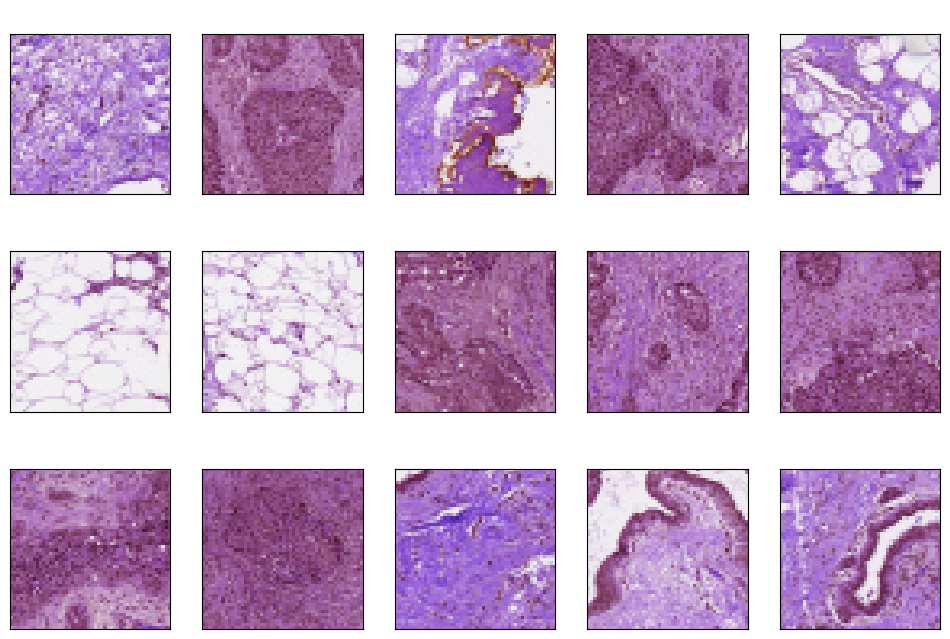

In [ ]:
# Visualize random brain tumor images from the dataset

# Set the figure size for better visualization
# Usage: Creates a 3x5 grid layout (15 images) for displaying sample brain tumor images.
plt.figure(figsize=(12, 8))

# Loop to display 15 random images from the dataset
for i in range(15):
    random = np.random.randint(1, len(df))  # Select a random index
    plt.subplot(3, 5, i + 1)  # Create a subplot (3 rows, 5 columns)
    
    # Read and display the image from the file path
    plt.imshow(cv2.imread(df.loc[random, "filepaths"]))
    
    # Set the title of the image as its label (No/Yes for tumor presence)
    plt.title(df.loc[random, "labels"], size=15, color="white")
    
    # Remove axis ticks for a cleaner visualization
    plt.xticks([])
    plt.yticks([])

# Display the final plot with all images
# Usage: Shows the randomly selected images with their respective labels.
# Return Type: None (Displays a matplotlib figure)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (95%) and testing (5%) sets
# Usage: Divides the dataset into train (95%) and test (5%) subsets.
# Return Type: Two pandas DataFrames (train and test)
train, test = train_test_split(df, train_size=0.95, random_state=0)

# Further splitting the training set into training (90%) and validation (10%) sets
# Usage: Creates a validation set from the training data (90% train, 10% validation).
# Return Type: Two pandas DataFrames (train_new and valid)
train_new, valid = train_test_split(train, train_size=0.90, random_state=0)

# Print dataset shapes to verify correct splitting
print(f"train set shape: {train_new.shape}")  # Training set shape
print(f"test set shape: {test.shape}")        # Testing set shape
print(f"validation set shape: {valid.shape}") # Validation set shape


train set shape: (1028, 2)
test set shape: (61, 2)
validation set shape: (115, 2)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training images
# Usage: Applies random transformations to the training images to improve model generalization.
# Includes rescaling, rotation, shifting, shearing, zooming, and flipping.
# Return Type: ImageDataGenerator object (for generating augmented image batches)
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.,           # Normalize pixel values (0-255) to (0-1)
    rotation_range=40,            # Random rotation up to 40 degrees
    width_shift_range=0.2,        # Random horizontal shift up to 20% of width
    height_shift_range=0.2,       # Random vertical shift up to 20% of height
    shear_range=0.2,              # Shear transformation up to 20%
    zoom_range=0.2,               # Random zoom up to 20%
    horizontal_flip=True,         # Random horizontal flipping
    vertical_flip=True            # Random vertical flipping
)

# Normalization for test images (without augmentation)
# Usage: Only rescales the test images without any augmentation.
# Ensures consistent input format for the model.
# Return Type: ImageDataGenerator object (for test/validation data)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.)


In [ ]:
# Creating generators for training, validation, and test datasets

# Training data generator with augmentation
# Usage: Loads images from file paths, applies data augmentation, resizes them to (224,224), 
# and prepares them for binary classification.
# Return Type: DirectoryIterator (yields batches of augmented image-label pairs)
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_new,       # Training dataset
    x_col='filepaths',         # Column containing image file paths
    y_col='labels',            # Column containing labels
    target_size=(224, 224),    # Resize images to 224x224
    batch_size=32,             # Number of images per batch
    class_mode='binary',       # Binary classification (0 or 1)
    shuffle=True               # Shuffle dataset for better training
)

# Validation data generator (without augmentation)
# Usage: Prepares validation data in the same format as training but without augmentation.
# Return Type: DirectoryIterator (yields batches of image-label pairs)
val_gen = train_datagen.flow_from_dataframe(
    dataframe=valid, 
    x_col='filepaths', 
    y_col='labels', 
    target_size=(224, 224), 
    batch_size=16, 
    class_mode='binary', 
    shuffle=True
)

# Test data generator (without augmentation and shuffle disabled for evaluation)
# Usage: Loads test images for model evaluation without applying augmentation.
# Return Type: DirectoryIterator (yields batches of image-label pairs)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='filepaths', 
    y_col='labels', 
    target_size=(224, 224), 
    batch_size=16, 
    class_mode='binary', 
    shuffle=False  # No shuffling for consistency during evaluation
)


Found 1028 validated image filenames belonging to 2 classes.
Found 115 validated image filenames belonging to 2 classes.
Found 61 validated image filenames belonging to 2 classes.


In [ ]:
# Get the class indices mapping from the training generator

# Usage: 
# Retrieves a dictionary that maps class labels (e.g., 'No' and 'Yes') to their corresponding numeric indices.
# This is useful to understand how the labels are encoded internally by the ImageDataGenerator.
# Example Output: {'No': 0, 'Yes': 1}

# Return Type: Dictionary (keys are class labels, values are integer indices)
train_gen.class_indices


{'No': 0, 'Yes': 1}

**Transfer Learning**

In [ ]:
from tensorflow import keras

# Load the pre-trained ResNet50V2 model (without the top classification layer)
base_model = keras.applications.ResNet50V2(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),  # Define input shape for images
    include_top=False,  # Exclude the fully connected classification layer
)

# Usage: 
# This pre-trained ResNet50V2 model extracts features from images without including the final classification layer.
# It helps in transfer learning, where we use learned features from ImageNet for a different classification task.

# Freeze the base_model to retain pre-trained weights
base_model.trainable = False

# Define the new model architecture
inputs = keras.Input(shape=(224, 224, 3))  # Input layer for 224x224 RGB images

# Ensure base_model runs in inference mode even when fine-tuning later
x = base_model(inputs, training=False)  # Extracts features from images
x = keras.layers.GlobalAveragePooling2D()(x)  # Applies global average pooling
x = keras.layers.Dropout(0.2)(x)  # Adds dropout to reduce overfitting
outputs = keras.layers.Dense(1, activation="sigmoid")(x)  # Output layer for binary classification

# Create the final model
model = keras.Model(inputs, outputs)

# Usage:
# This model is a modified ResNet50V2 with a new classifier for binary classification (e.g., detecting breast cancer).
# It uses a sigmoid activation function, making it suitable for binary classification.

# Return Type:
# The `model` is an instance of `keras.Model`, ready for compilation and training.

model.summary()  # Displays model architecture


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,566,849 (89.90 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
# Define callbacks
callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint(
        "Tumor_classifier_model.keras",  # Saves the best model based on validation loss
        save_best_only=True,  # Saves only the best model to avoid overwriting with worse models
        verbose=0  # No console output during checkpoint saving
    )
]

# Usage:
# The ModelCheckpoint callback automatically saves the best version of the model based on validation performance.
# This prevents overfitting and allows restoring the best model later.

# Compile the model
model.compile(
    loss='binary_crossentropy',  # Binary classification loss function
    optimizer=Adam(learning_rate=0.0001),  # Adam optimizer with a small learning rate for stable training
    metrics=['accuracy']  # Track accuracy during training
)

# Usage:
# The model is compiled for binary classification using 'binary_crossentropy' since the output is sigmoid-activated.
# Adam is used for optimization, providing adaptive learning rates.

# Train the model
history = model.fit(
    train_gen,  # Training dataset
    validation_data=val_gen,  # Validation dataset
    epochs=100,  # Number of training iterations
    callbacks=callbacks,  # Includes checkpointing to save the best model
    verbose=1  # Prints training progress
)

# Usage:
# Trains the model on the training dataset while monitoring performance on the validation set.
# Runs for 100 epochs but can be stopped early if needed.

# Return Type:
# `history` is an instance of `tensorflow.python.keras.callbacks.History`.
# It contains training loss, validation loss, accuracy, and other metrics over epochs.



C:\Users\SABBIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5442 - loss: 0.7279 - val_accuracy: 0.6435 - val_loss: 0.6579
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5821 - loss: 0.6759 - val_accuracy: 0.7478 - val_loss: 0.5873
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6785 - loss: 0.6062 - val_accuracy: 0.6870 - val_loss: 0.6077
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6884 - loss: 0.5872 - val_accuracy: 0.7217 - val_loss: 0.5496
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7532 - loss: 0.5337 - val_accuracy: 0.7478 - val_loss: 0.5096
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 977ms/step - accuracy: 0.7473 - loss: 0.5268 - val_accuracy: 0.8261 - val_loss: 0.4608
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 983ms/step - accuracy: 0.7994 - loss: 0.4801 - val_accuracy: 0.8174 - val_loss: 0.4823
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7805 - loss: 0.4854 - val_accuracy: 0.82

In [31]:
# Save the model using the native Keras format
model.save("modelNew.keras")


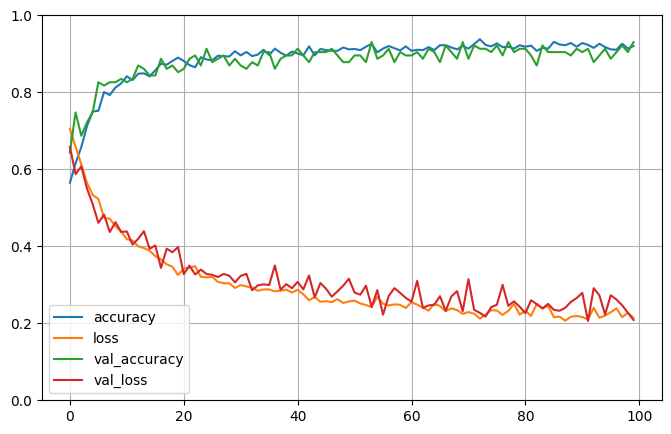

In [ ]:
# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5))  # Plot the loss and accuracy curves
plt.grid(True)  # Add grid for better readability
plt.gca().set_ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.show()  # Display the plot

# Usage:
# This code visualizes the training history of the model by plotting loss and accuracy 
# for both training and validation sets over the epochs.

# Return Type:
# This code does not return anything (`None`).
# It generates and displays a matplotlib plot showing the model's performance over time.


In [ ]:
from PIL import Image
import cv2
import numpy as np
import tensorflow as tf

# Load the trained model
model_path = "modelNew.keras"
loaded_model = tf.keras.models.load_model(model_path)

# Read and preprocess the image
image = cv2.imread("./archive/10264/0/10264_idx5_x1001_y551_class0.png")  # Load the image

image_fromarray = Image.fromarray(image, 'RGB')  # Convert OpenCV image to PIL format
resize_image = image_fromarray.resize((224, 224))  # Resize image to match model input shape

expand_input = np.expand_dims(resize_image, axis=0)  # Add batch dimension
input_data = np.array(expand_input)  # Convert to NumPy array
input_data = input_data / 255.0  # Normalize pixel values

# Make a prediction
pred = loaded_model.predict(input_data)

# Output the result
if pred >= 0.5:
    print("Yes")  # Tumor detected
else:
    print("No")  # No tumor detected

# Usage:
# This script loads a trained Keras model and performs image classification for tumor detection.
# It reads an input image, preprocesses it (resizing, normalizing), and predicts whether the image 
# indicates the presence of a tumor (binary classification).

# Return Type:
# Prints either "Yes" (if the predicted probability is ≥ 0.5, indicating a tumor) 
# or "No" (if the probability is < 0.5, indicating no tumor).


C:\Users\SABBIR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
No


In [ ]:
# Get class indices from the training data generator
class_indices = train_gen.class_indices
print(class_indices)  # Output the class indices

# Usage:
# The `class_indices` attribute of the ImageDataGenerator provides a dictionary mapping class labels 
# (e.g., 'No' and 'Yes') to their corresponding numeric indices. This is useful when interpreting model predictions.

# Return Type:
# Returns a dictionary where keys are class labels (e.g., 'No', 'Yes') and values are their respective indices (e.g., {‘No’: 0, ‘Yes’: 1}).


{'No': 0, 'Yes': 1}